In [5]:
import numpy as np
import pandas as pd
from scipy.io import loadmat

In [4]:
 # machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#import xgboost as xgb

In [5]:
behav8 = pd.read_csv('data_behavioral/gamble.data.s08.csv')
behav8.head()

,round,newround.time,choice.time,buttonpress.time,conf.time,reveal.time,choice.class,choice.location,outcome
0,1,331.856,332.653,334.200,334.216,334.231,Gamble,Left,Win
1,2,335.263,336.060,337.216,337.247,337.263,Safebet,Right,WouldHaveWon
2,3,338.278,339.075,340.450,340.466,340.481,Safebet,Left,WouldHaveWon
3,4,341.513,342.310,344.247,344.278,344.294,Gamble,Left,Win
4,5,345.310,346.106,347.497,347.513,347.544,Safebet,Right,WouldHaveLost


In [6]:
from scipy.io import loadmat

badTrials = loadmat('bad_trials_OFC.mat')
badTrials

#subjects except for subject 8 & 9 don't match for trial #s
#behavior some are timed out 

{'__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Sep 27 15:27:57 2018',
 '__version__': '1.0',
 'bad_trials_OFC': array([[0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 1],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [7]:
neur8 = loadmat('s08_ofc_hg_events.mat')

In [15]:
list(neur8)
'''

Electrophysiological data
Each .mat file contains the following variables:

1. game_events_hg: a nTrials x nTimePoints x nElectrodes matrix containing the HG 
activity across all electrodes for each subject, sampled at 1KHz. Each trial 
contains the data at [-1,2]s around each game presentation event.

2. game_window_events_hg: same data as game_events_hg after window averaging (200ms
windows at 50ms increments; see paper Methods for details). 

3. buttonpress_events_hg: as buttonpress_events_hg, but centered around each button press 
(subject choice) event.

4. buttonpress_window_events_hg: as game_window_events_hg, but derived from 
buttonpress_events_hg. 


'''
neur8['buttonpress_events_hg']

electrodes = ['Electrode_' + str(x) for x in range(1, 11)]

#button8 = pd.DataFrame(data = neur8['buttonpress_events_hg'], columns = electrodes)

neur8['buttonpress_events_hg'].shape
#button8.head()
neur8['game_events_hg'].shape


(200, 3001, 10)

In [58]:
electrodes

['Electrode_1',
 'Electrode_2',
 'Electrode_3',
 'Electrode_4',
 'Electrode_5',
 'Electrode_6',
 'Electrode_7',
 'Electrode_8',
 'Electrode_9',
 'Electrode_10']

In [23]:
neur8['buttonpress_events_hg'].shape

(200, 3001, 10)

In [16]:
#create data frames for each electrode. use a dictionary for convenience and naming. 
#this is for buttonpress_events_hg & game_events_hg
electrodesBPE = {}
electrodesGE = {}
for x in range(0, 10):
    electrodesBPE[electrodes[x]] = neur8['buttonpress_events_hg'][:, :, x]
    electrodesGE[electrodes[x]] = neur8['game_events_hg'][:, :, x]
    
    
# reduce to 0 to 1000 ms

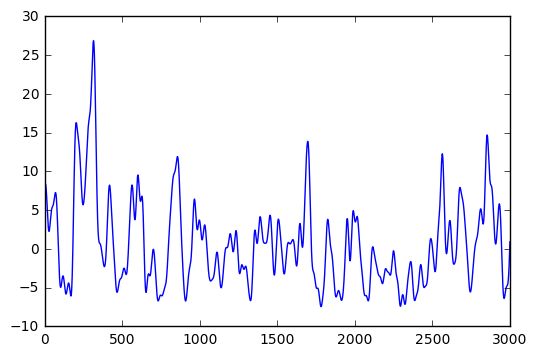

In [17]:
''' 
data to generate:
- average wave for each electrode, each trial (each second)
- min, max for each electrode, each trial (each second)

--> add these points to behav8

can split dataset into 3 parts for seconds.
'''

# do an example for electrode 1, trial 1. 

# what does the data represent? difference between game events & button press event?

import matplotlib.pyplot as plt

plt.plot(neur8['buttonpress_events_hg'][0,:,0].T)
plt.show()

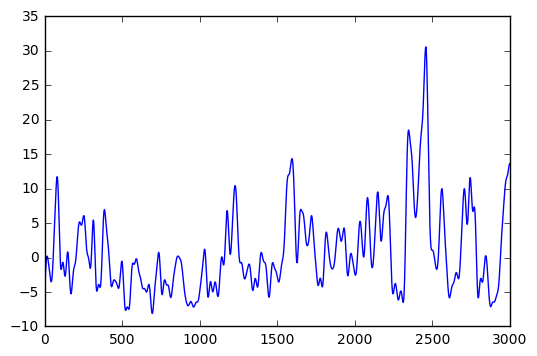

In [18]:
plt.plot(neur8['game_events_hg'][0,:,0].T)
plt.show()

In [29]:
neur8['buttonpress_window_events_hg'].shape

(200, 57, 10)

In [34]:
# do an example for electrode 1, trial 1. 
electrodesBPE['Electrode_1'].shape
avgE1 = [np.mean(i) for i in electrodesBPE['Electrode_1']]

#np.average(electrodesBPE['Electrode_1'][0, :])
len(avgE1)



# initialize columns

for electrode in electrodes:
    behav8[electrode + '_avgBP'] = [np.mean(i) for i in electrodesBPE[electrode]]
    behav8[electrode + '_minBP'] = [min(i) for i in electrodesBPE[electrode]]
    behav8[electrode + '_maxBP'] = [max(i) for i in electrodesBPE[electrode]]
    behav8[electrode + '_sdBP'] = [np.std(i) for i in electrodesBPE[electrode]]
    

    # also for game events
    
    behav8[electrode + '_avgGE'] = [np.mean(i) for i in electrodesGE[electrode]]
    behav8[electrode + '_minGE'] = [np.min(i) for i in electrodesGE[electrode]]
    behav8[electrode + '_maxGE'] = [np.max(i) for i in electrodesGE[electrode]]
    behav8[electrode + '_sdGE'] = [np.std(i) for i in electrodesGE[electrode]]
       
# there are many other things to do with the data, such as adding in avg per second.     

In [25]:
np.max(electrodesBPE['Electrode_1'][0, :])

26.868347

In [35]:
behav8.head()

,round,newround.time,choice.time,buttonpress.time,conf.time,reveal.time,choice.class,choice.location,outcome,Electrode_1_avgBP,...,Electrode_9_sdBP,Electrode_9_avgGE,Electrode_9_minGE,Electrode_9_maxGE,Electrode_9_sdGE,Electrode_10_sdBP,Electrode_10_avgGE,Electrode_10_minGE,Electrode_10_maxGE,Electrode_10_sdGE
0,1,331.856,332.653,334.200,334.216,334.231,Gamble,Left,Win,0.626383,...,4.777393,3.223118,-4.385119,22.050924,5.028584,9.356254,2.771444,-5.182070,42.484066,7.220509
1,2,335.263,336.060,337.216,337.247,337.263,Safebet,Right,WouldHaveWon,3.069692,...,5.374425,-2.022406,-10.245128,17.650156,4.604584,7.462085,-2.231717,-12.027114,48.651333,9.074130
2,3,338.278,339.075,340.450,340.466,340.481,Safebet,Left,WouldHaveWon,-4.822321,...,6.474900,-4.092527,-15.991223,17.792549,6.787434,9.304393,-2.760110,-12.191625,50.056202,9.161549
3,4,341.513,342.310,344.247,344.278,344.294,Gamble,Left,Win,-7.254536,...,3.853718,-1.290316,-11.269731,25.278475,6.205656,12.998384,2.281954,-5.321077,64.502968,9.141026
4,5,345.310,346.106,347.497,347.513,347.544,Safebet,Right,WouldHaveLost,-2.551188,...,5.746507,1.484970,-7.191306,22.624266,5.235998,8.202618,0.515470,-12.807647,83.155434,14.008977


In [53]:
#convert left and right in choice location to 0 and 1 (respectively)
behav8['choice.location'].isnull().any()

behav8['convertedLocation'] = np.nan
for index, row in behav8.iterrows():
    if row['choice.location'] == 'Left':
        behav8.at[index, 'convertedLocation'] = 0
    else:
        behav8.at[index, 'convertedLocation'] = 1
        
behav8.head()
        


,round,newround.time,choice.time,buttonpress.time,conf.time,reveal.time,choice.class,choice.location,outcome,Electrode_1_avgBP,...,Electrode_9_avgGE,Electrode_9_minGE,Electrode_9_maxGE,Electrode_9_sdGE,Electrode_10_sdBP,Electrode_10_avgGE,Electrode_10_minGE,Electrode_10_maxGE,Electrode_10_sdGE,convertedLocation
0,1,331.856,332.653,334.200,334.216,334.231,Gamble,Left,Win,0.626383,...,3.223118,-4.385119,22.050924,5.028584,9.356254,2.771444,-5.182070,42.484066,7.220509,0.0
1,2,335.263,336.060,337.216,337.247,337.263,Safebet,Right,WouldHaveWon,3.069692,...,-2.022406,-10.245128,17.650156,4.604584,7.462085,-2.231717,-12.027114,48.651333,9.074130,1.0
2,3,338.278,339.075,340.450,340.466,340.481,Safebet,Left,WouldHaveWon,-4.822321,...,-4.092527,-15.991223,17.792549,6.787434,9.304393,-2.760110,-12.191625,50.056202,9.161549,0.0
3,4,341.513,342.310,344.247,344.278,344.294,Gamble,Left,Win,-7.254536,...,-1.290316,-11.269731,25.278475,6.205656,12.998384,2.281954,-5.321077,64.502968,9.141026,0.0
4,5,345.310,346.106,347.497,347.513,347.544,Safebet,Right,WouldHaveLost,-2.551188,...,1.484970,-7.191306,22.624266,5.235998,8.202618,0.515470,-12.807647,83.155434,14.008977,1.0


In [54]:
from sklearn.model_selection import train_test_split

X = behav8.drop(['choice.class', 'outcome', 'choice.location'], axis = 1)
Y = behav8['outcome']



x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)


In [55]:
from sklearn import linear_model

# Name our logistic regression object
LogisticRegressionModel = linear_model.LogisticRegression()

# we create an instance of logistic Regression Classifier and fit the data.
print ('Training a logistic Regression Model..')
LogisticRegressionModel.fit(x_train, y_train)

training_accuracy=LogisticRegressionModel.score(x_train,y_train)
print ('Training Accuracy: ', training_accuracy)

Training a logistic Regression Model..
('Training Accuracy: ', 0.97499999999999998)


In [56]:
test_accuracy=LogisticRegressionModel.score(x_test,y_test)
print('Accuracy of the model on unseen test data: ',test_accuracy)

('Accuracy of the model on unseen test data: ', 0.42499999999999999)


In [57]:
#serious overfitting in the above. 
# going to check it out in r...
behav8.to_csv('behav8_v1.csv')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import mne
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator,
                          cross_val_multiscore, LinearModel, get_coef)
import pandas as pd


In [3]:
 best_trials = pd.read_csv('best_trials_master_df.csv')

In [8]:
neur8 = loadmat('s08_ofc_hg_events.mat')
neur8

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed Oct  4 10:18:12 2017',
 '__version__': '1.0',
 '__globals__': [],
 'buttonpress_events_hg': array([[[  8.189263  ,  -3.3722084 ,  -2.2066743 , ...,  -5.42372   ,
           19.079905  ,   0.42457733],
         [  8.309072  ,  -3.7229521 ,  -2.248763  , ...,  -5.406721  ,
           18.957127  ,   0.6265146 ],
         [  8.381103  ,  -4.033373  ,  -2.2611573 , ...,  -5.436369  ,
           18.791298  ,   0.8089374 ],
         ...,
         [ -0.3490263 ,   3.5280123 ,  23.265627  , ...,   3.3741572 ,
           10.448634  ,   8.574485  ],
         [  0.27512226,   3.8945847 ,  22.758974  , ...,   4.1000443 ,
           10.329502  ,   8.384635  ],
         [  0.9248714 ,   4.243525  ,  22.263474  , ...,   4.8184342 ,
           10.1563015 ,   8.156524  ]],
 
        [[  8.282565  ,   9.261214  ,  16.951536  , ...,   9.476936  ,
           -0.24441488,   0.36490318],
         [  8.261956  ,   9.516955  ,  16.579891  